<a href="https://colab.research.google.com/github/ArezooNajafi/Arezoo_Najafi-Portfolio/blob/master/Automobile_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Description**

The dataset used for this visualization assignment contains **historical automobile sales data** representing automobile sales and related variables during recession and non-recession periods.

The dataset includes the following variables:
1. **Date:** The date of the observation.
2. **Recession:** A binary variable indicating recession period; **1** means it was a recession, **0** means it was normal.
3. **Automobile_Sales:** The number of vehicles sold during the period.
4. **GDP:** The per capita GDP value in USD.
5. **Unemployment_Rate:** The monthly unemployment rate.
6. **Consumer_Confidence:** A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. **Seasonality_Weight:** The weight representing the seasonality effect on automobile sales during the period.
8. **Price:** The average vehicle price during the period.
9. **Advertising_Expenditure:** The advertising expenditure of the company during the period.
"""

In [ ]:
!pip install pandas
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
# import data

URL= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [ ]:
import matplotlib.pyplot as plt

df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line


,Automobile_Sales
Year,
1980,678.950000
1981,633.408333
1982,631.150000
1983,2889.350000
1984,2972.250000
1985,3176.133333
1986,2341.133333
1987,2288.166667
1988,3074.500000


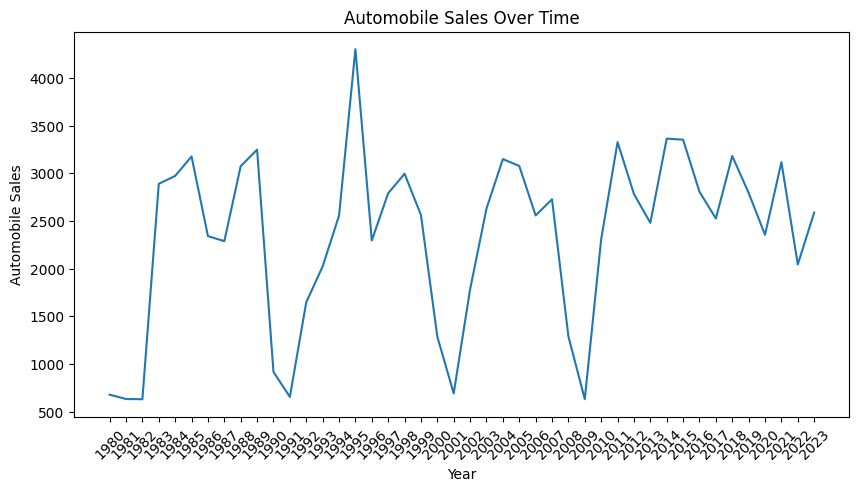

In [ ]:
df_line.plot(kind="line", figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales Over Time")
plt.xticks(df_line.index, rotation=45, fontsize=10)
plt.show()

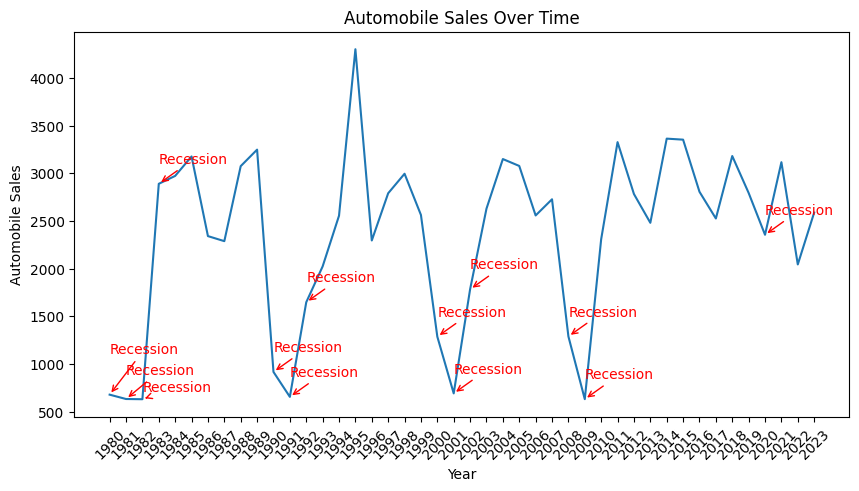

In [ ]:
import matplotlib.pyplot as plt

df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind="line", figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales Over Time")
plt.xticks(df_line.index, rotation=45, fontsize=10)  # Rotate x-ticks and set font size

# List of recession years (replace with actual years if needed)
recession_years = df[df['Recession'] == 1]['Year'].unique()

# Specific offsets for the years 1980, 1981, and 1982
specific_offsets = {1980: 0.1, 1981: 0.06, 1982: 0.02}

for year in recession_years:
    offset = specific_offsets.get(year, 0.05)  # Use specific offset if available, otherwise default to 0.05
    plt.annotate('Recession',
                 xy=(year, df_line.loc[year]),    # Where to place the annotation
                 xytext=(year, df_line.loc[year] + df_line.max() * offset),  # Adjust text position based on offset
                 arrowprops=dict(arrowstyle='->', color='red'),  # Add an arrow
                 color='red')

plt.show()



In [ ]:
recession_years = df[df['Recession'] == 1]['Year'].unique()
recession_years

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020])

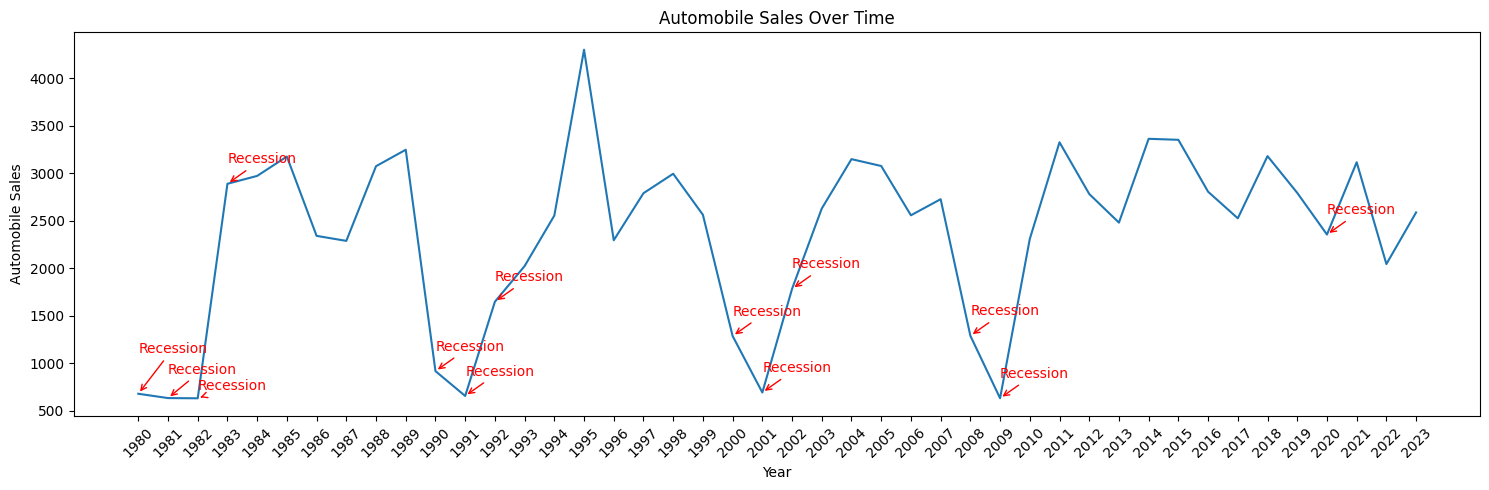

In [ ]:
import matplotlib.pyplot as plt

df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind="line", figsize=(15, 5))  # Increase the width of the plot
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales Over Time")
plt.xticks(df_line.index, rotation=45, fontsize=10)  # Rotate x-ticks and set font size

# List of recession years (replace with actual years if needed)
recession_years = df[df['Recession'] == 1]['Year'].unique()

# Specific offsets for the years 1980, 1981, and 1982
specific_offsets = {1980: 0.1, 1981: 0.06, 1982: 0.02}

for year in recession_years:
    offset = specific_offsets.get(year, 0.05)  # Use specific offset if available, otherwise default to 0.05
    plt.annotate('Recession',
                 xy=(year, df_line.loc[year]),    # Where to place the annotation
                 xytext=(year, df_line.loc[year] + df_line.max() * offset),  # Adjust text position based on offset
                 arrowprops=dict(arrowstyle='->', color='red'),  # Add an arrow
                 color='red')

plt.tight_layout()  # Add padding to the plot
plt.show()


In [ ]:
mean_sales = recession_years.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
mean_sales

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

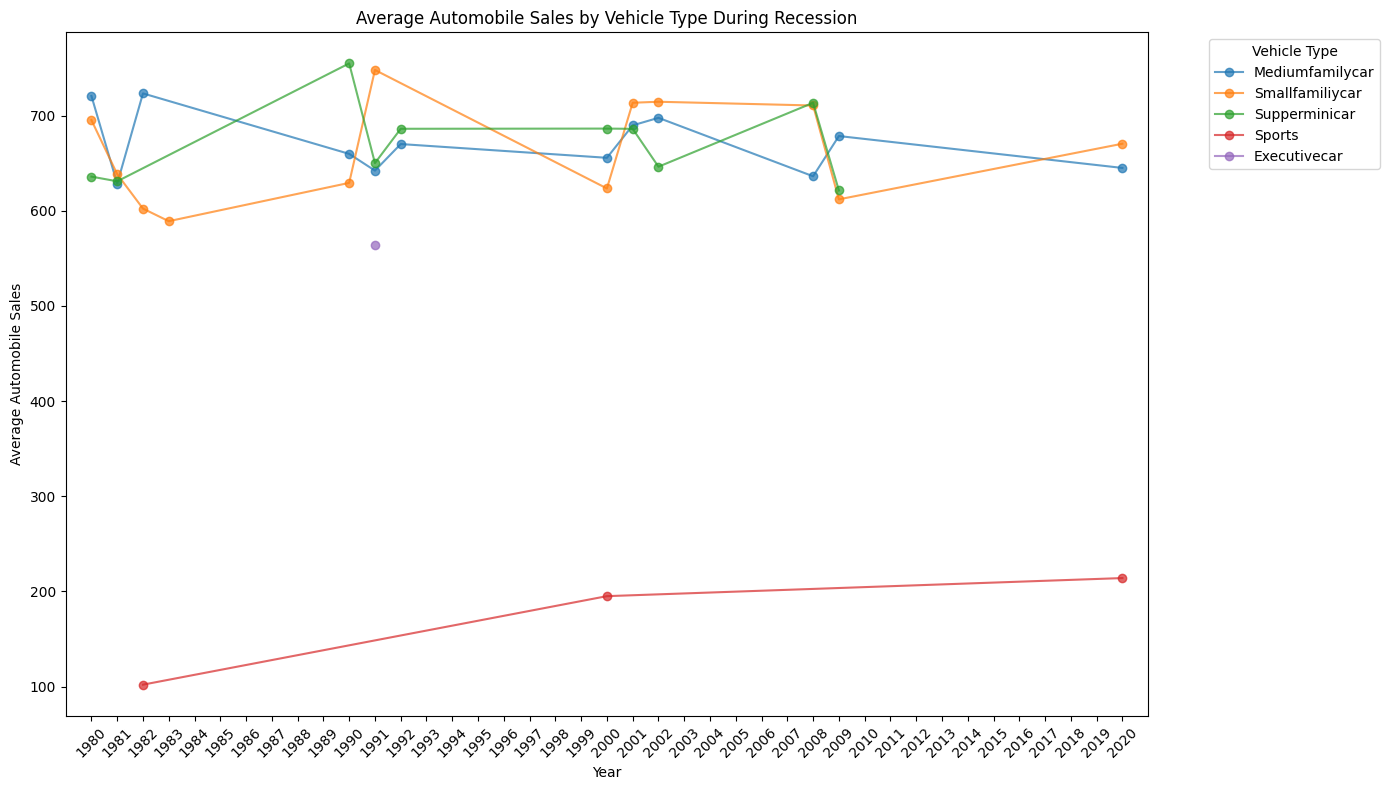

In [ ]:
# Filter data for recession years
recession_years = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type, calculating the mean of Automobile_Sales
mean_sales = recession_years.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create the plot
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot each Vehicle_Type's mean sales
for vehicle_type in mean_sales['Vehicle_Type'].unique():
    subset = mean_sales[mean_sales['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=vehicle_type, marker='o', linestyle='-', alpha=0.7)

# Adding axis labels
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')

# Adjust x-axis limits if necessary
plt.xlim(mean_sales['Year'].min() - 1, mean_sales['Year'].max() + 1)

# Adjust x-axis tick frequency if needed
plt.xticks(range(mean_sales['Year'].min(), mean_sales['Year'].max() + 1, 1))

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Add legend and title
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Automobile Sales by Vehicle Type During Recession')

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Create a new column 'Period' to distinguish between Recession and Non-Recession
df['Period'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,Period
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,Recession
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,Recession
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,Recession
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,Recession
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,Recession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York,Non-Recession
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California,Non-Recession
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California,Non-Recession
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia,Non-Recession


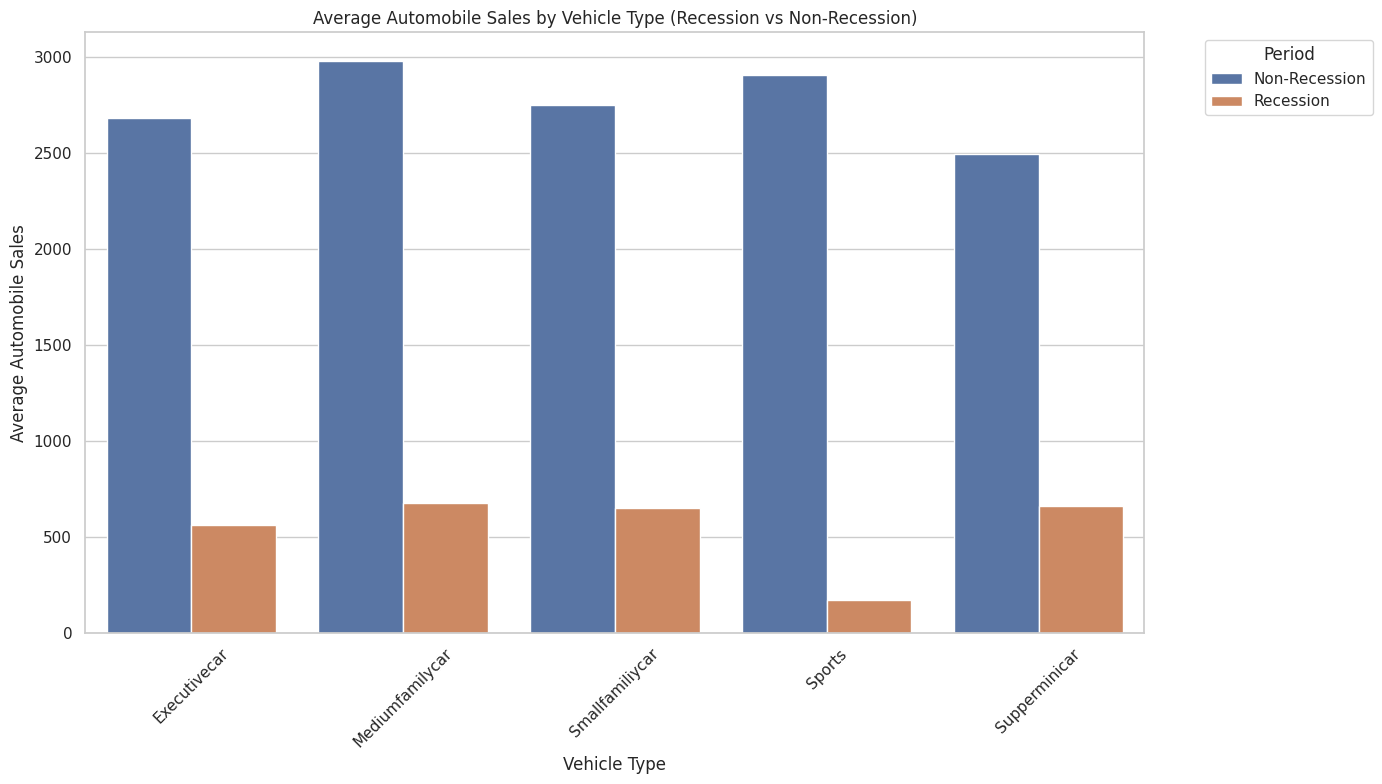

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column 'Period' to distinguish between Recession and Non-Recession
df['Period'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Group by Vehicle_Type and Period, calculating the average of Automobile_Sales
average_sales = df.groupby(['Vehicle_Type', 'Period'], as_index=False)['Automobile_Sales'].mean()

# Set the Seaborn style for the plot
sns.set(style="whitegrid")

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=average_sales, x='Vehicle_Type', y='Automobile_Sales', hue='Period')

# Adding axis labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Vehicle Type (Recession vs Non-Recession)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


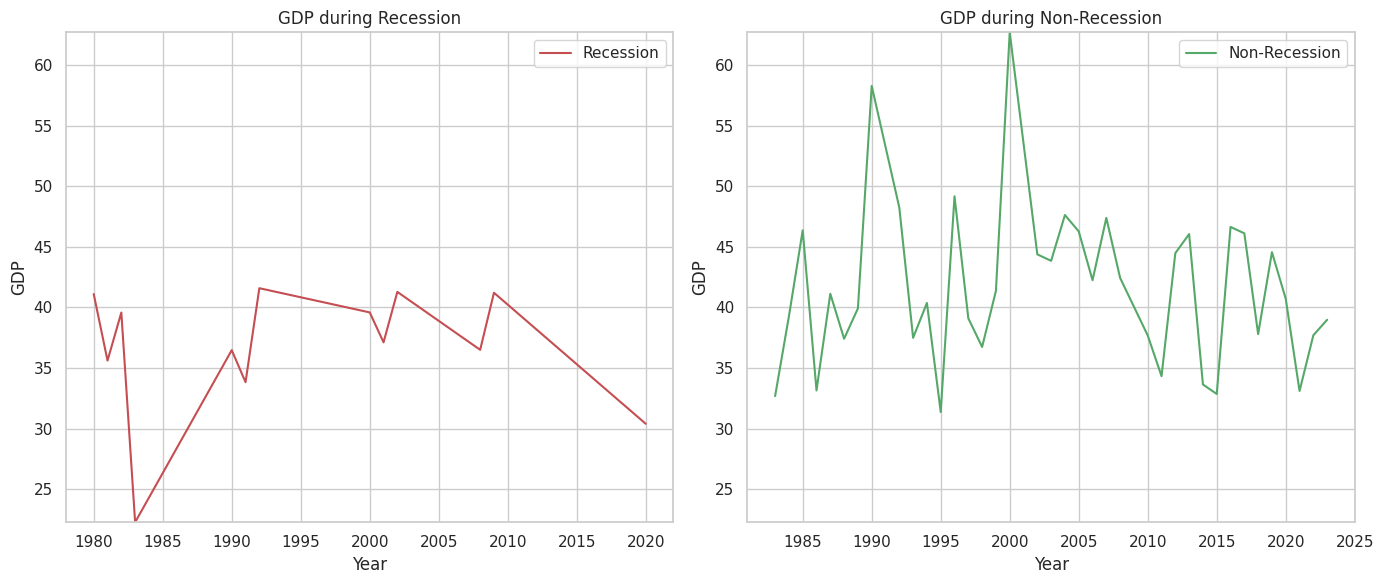

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data
df_recession = df[df['Period'] == "Recession"]
df_non_recession = df[df['Period'] == 'Non-Recession']

# Group and calculate mean GDP
df_recession_GDP = df_recession.groupby('Year')['GDP'].mean().reset_index()
df_non_recession_GDP = df_non_recession.groupby('Year')['GDP'].mean().reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Recession GDP with Seaborn
sns.lineplot(x='Year', y='GDP', data=df_recession_GDP, ax=ax1, label='Recession', color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP during Recession')
ax1.legend()

# Plot Non-Recession GDP with Seaborn
sns.lineplot(x='Year', y='GDP', data=df_non_recession_GDP, ax=ax2, label='Non-Recession', color='g')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('GDP during Non-Recession')
ax2.legend()

# Set same y-axis limits for both plots
y_min = min(df_recession_GDP['GDP'].min(), df_non_recession_GDP['GDP'].min())
y_max = max(df_recession_GDP['GDP'].max(), df_non_recession_GDP['GDP'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
df_recession_GDP=df_recession.groupby('Year')['GDP'].mean()
df_recession_GDP

,GDP
Year,
1980,41.101917
1981,35.615250
1982,39.580667
1983,22.287000
1990,36.477182
1991,33.833250
1992,41.585333
2000,39.588111
2001,37.122083


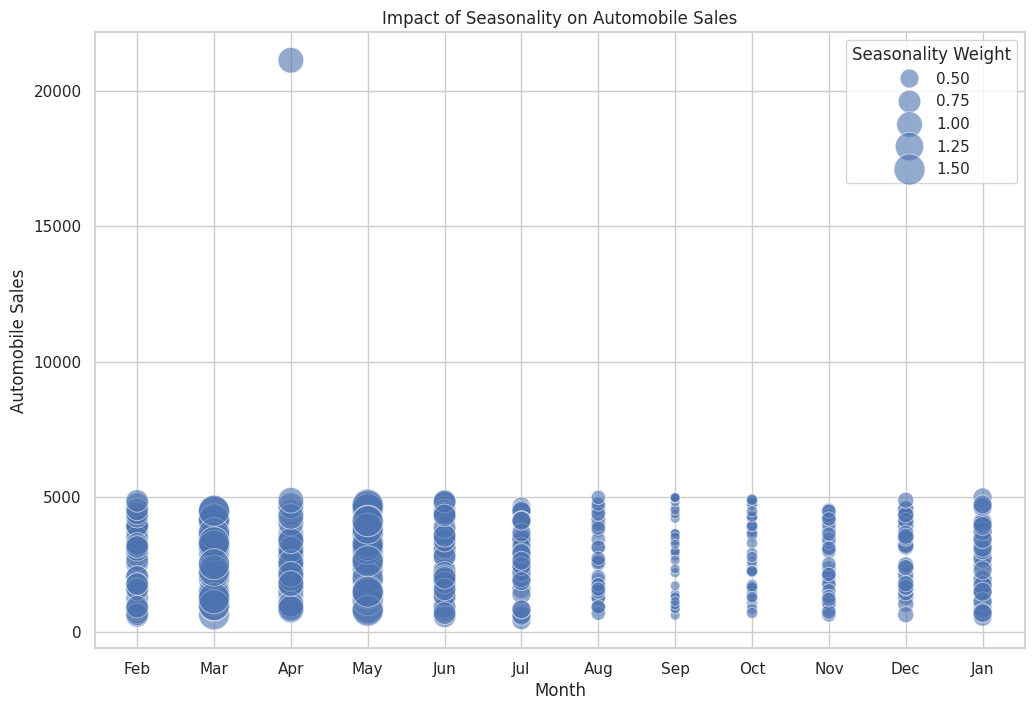

In [ ]:
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(x='Month', y='Automobile_Sales', data=df_non_recession, size='Seasonality_Weight', sizes=(50, 500), alpha=0.6, edgecolor="w")

# Customize x-ticks with month names

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Impact of Seasonality on Automobile Sales')
plt.grid(True)

# Customize the legend
handles, labels = bubble_plot.get_legend_handles_labels()
bubble_plot.legend(handles=handles[1:], labels=labels[1:], title='Seasonality Weight')

# Show the plot
plt.show()

<Axes: xlabel='Consumer_Confidence', ylabel='Automobile_Sales'>

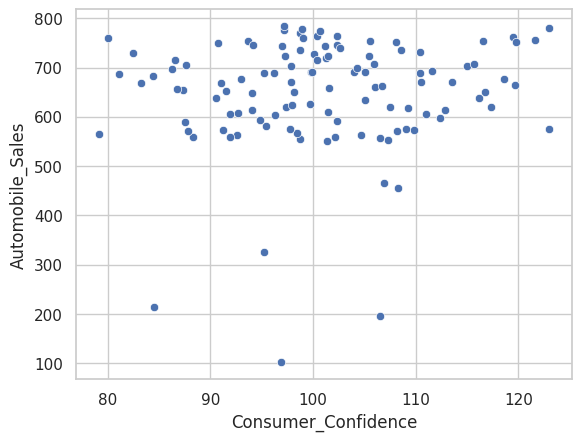

In [ ]:
sns.scatterplot(x="Consumer_Confidence",y="Automobile_Sales",data=df_recession)

In [ ]:
correlation=df_recession['Consumer_Confidence'].corr(df_recession['Automobile_Sales'])
correlation

0.10079346234795698

Text(0.5, 1.0, ' Advertising Expenditure during Non-Recession')

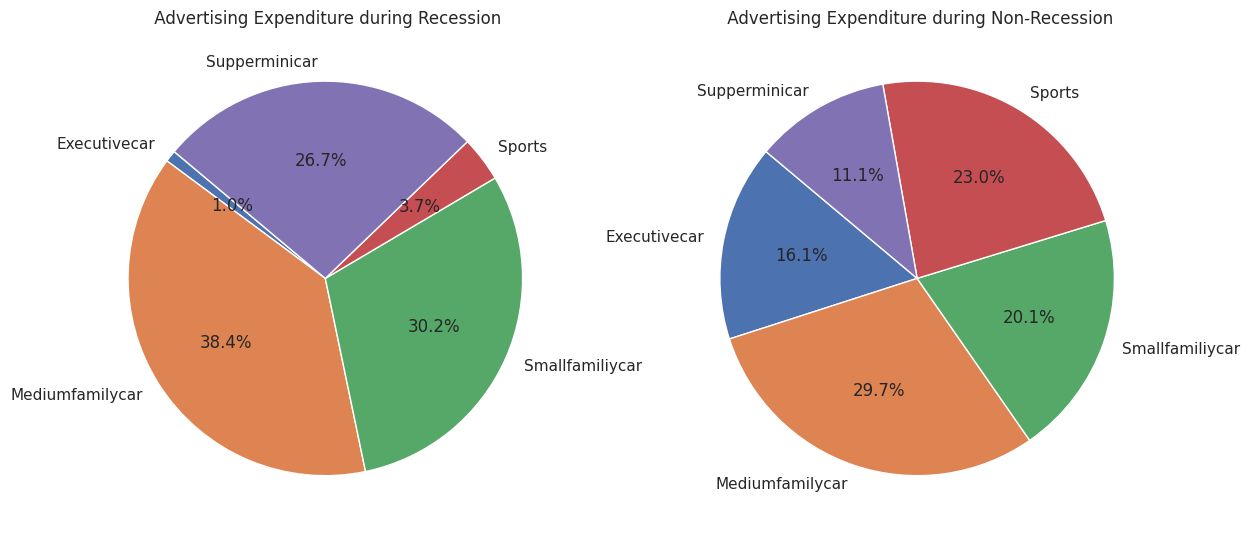

In [ ]:
df_ad_cost_rec= df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
df_ad_cost_non_rec= df_non_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Recession Pie Chart
ax1.pie(df_ad_cost_rec, labels=df_ad_cost_rec.index, autopct='%1.1f%%', startangle=140)
ax1.set_title(' Advertising Expenditure during Recession')

# Non-Recession Pie Chart
ax2.pie(df_ad_cost_non_rec, labels=df_ad_cost_non_rec.index, autopct='%1.1f%%', startangle=140)
ax2.set_title(' Advertising Expenditure during Non-Recession')

# Show the plots

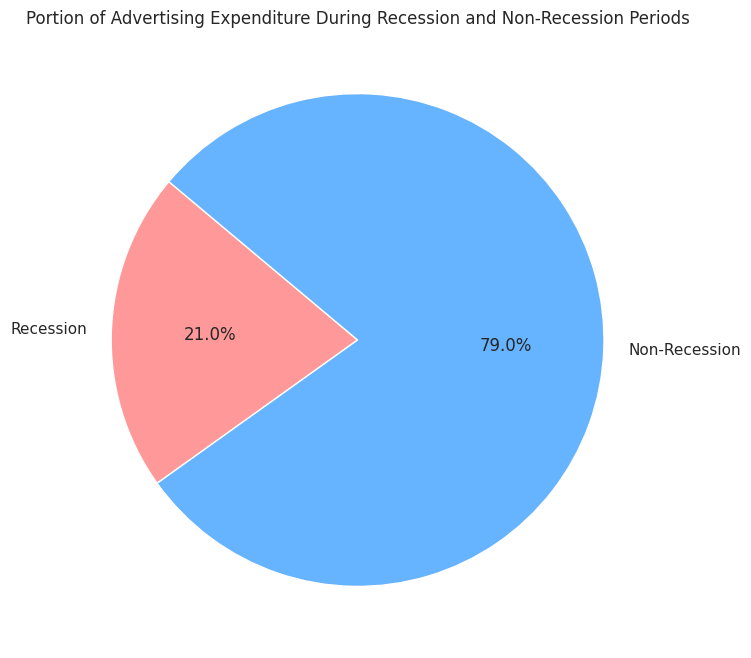

In [ ]:
import matplotlib.pyplot as plt

# Summing the total advertising expenditure for recession and non-recession periods
total_ad_cost_rec = df_recession['Advertising_Expenditure'].sum()
total_ad_cost_non_rec = df_non_recession['Advertising_Expenditure'].sum()

# Data for the pie chart
ad_expenditure = [total_ad_cost_rec, total_ad_cost_non_rec]
labels = ['Recession', 'Non-Recession']
colors = ['#ff9999', '#66b3ff']  # Optional: colors for better visualization

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Portion of Advertising Expenditure During Recession and Non-Recession Periods')

# Display the plot
plt.show()


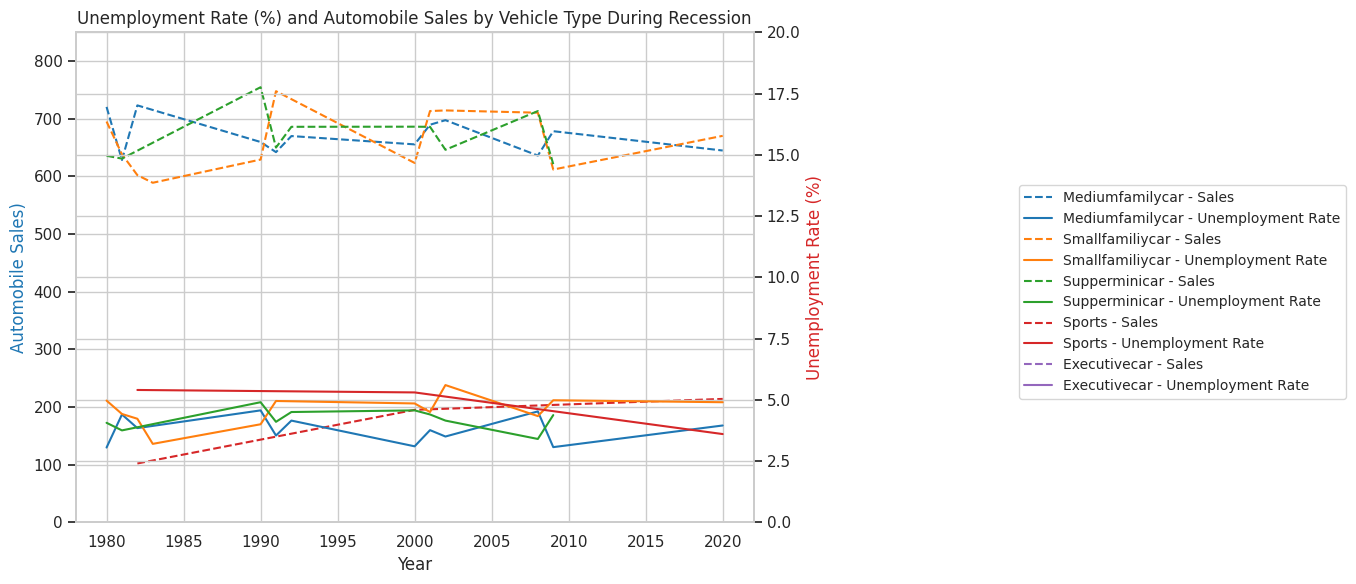

In [ ]:
import matplotlib.pyplot as plt

# Grouping data for recession period
df_unemployment_sales_rec = df_recession.groupby(['Year', 'Vehicle_Type']).agg({
    'unemployment_rate': 'mean',
    'Automobile_Sales': 'mean'
}).reset_index()

# Sorting the data for proper alignment
df_unemployment_sales_rec.sort_values(by=['Year'], inplace=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Secondary y-axis for unemployment rate
ax2 = ax1.twinx()

# Plotting Automobile Sales and Unemployment Rate
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
vehicle_types = df_unemployment_sales_rec['Vehicle_Type'].unique()

lines = []  # To collect line objects for legends
labels = []  # To collect labels for legends

for i, vehicle_type in enumerate(vehicle_types):
    subset = df_unemployment_sales_rec[df_unemployment_sales_rec['Vehicle_Type'] == vehicle_type]

    # Plotting Automobile Sales (Primary Y-Axis)
    line1, = ax1.plot(subset['Year'], subset['Automobile_Sales'],
                      label=f'{vehicle_type} - Sales', linestyle='--', color=colors[i % len(colors)])

    # Plotting Unemployment Rate (Secondary Y-Axis)
    line2, = ax2.plot(subset['Year'], subset['unemployment_rate'],
                      label=f'{vehicle_type} - Unemployment Rate', linestyle='-', color=colors[i % len(colors)])

    # Collecting lines and labels for the legend
    lines.extend([line1, line2])
    labels.extend([line1.get_label(), line2.get_label()])

# Customization
ax1.set_xlabel('Year')
ax1.set_ylabel('Automobile Sales)', color='tab:blue')
ax2.set_ylabel('Unemployment Rate (%)', color='tab:red')
ax1.set_title('Unemployment Rate (%) and Automobile Sales by Vehicle Type During Recession')

# Adjust Y-limits
ax1.set_ylim(0, 850)         # For sales
ax2.set_ylim(0, 20)          # For unemployment rate

# Legend positioned outside the plot
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

plt.show()


In [ ]:
df_unemployment_sales_rec

,Year,Vehicle_Type,unemployment_rate,Automobile_Sales
0,1980,Mediumfamilycar,3.050000,720.625000
1,1980,Smallfamiliycar,4.966667,695.233333
2,1980,Supperminicar,4.060000,635.840000
3,1981,Mediumfamilycar,4.400000,628.400000
4,1981,Smallfamiliycar,4.420000,638.420000
5,1981,Supperminicar,3.750000,630.900000
6,1982,Mediumfamilycar,3.842857,723.271429
7,1982,Smallfamiliycar,4.225000,602.225000
8,1982,Sports,5.400000,102.000000
9,1983,Smallfamiliycar,3.200000,589.000000


In [ ]:
!pip install plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:
import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv(URL)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load DataFrame (Replace with actual data loading method)
df = pd.read_csv(URL)  # Replace with actual file

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Analysis", style={'textAlign': 'center'}),

    # Dropdown for Vehicle Type
    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
        value=df['Vehicle_Type'].unique()[0],
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown for City
    html.Label("Select City:"),
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in df['City'].unique()],
        value=df['City'].unique()[0],
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown for Statistics
    html.Label("Select Statistic Type:"),
    dcc.Dropdown(
        id='statistic-dropdown',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession',
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Output Division
    html.Div(id='output-container', className='output-style'),

    # Graphs
    dcc.Graph(id='sales-trend-graph'),
    dcc.Graph(id='statistic-graph'),
])

# Callback to update graph based on selection
@app.callback(
    [Output('sales-trend-graph', 'figure'),
     Output('statistic-graph', 'figure')],
    [Input('vehicle-type-dropdown', 'value'),
     Input('city-dropdown', 'value'),
     Input('statistic-dropdown', 'value')]
)
def update_graph(selected_vehicle, selected_city, selected_stat):
    filtered_df = df[(df['Vehicle_Type'] == selected_vehicle) & (df['City'] == selected_city)]

    sales_fig = px.line(
        filtered_df, x='Year', y='Automobile_Sales',
        title=f'Automobile Sales Trend for {selected_vehicle} in {selected_city}',
        markers=True
    )

    if selected_stat == 'recession':
        stat_fig = px.bar(
            df, x='Year', y='Recession',
            title='Recession Impact on Sales',
            color='Recession'
        )
    else:
        stat_fig = px.bar(
            df, x='Year', y='Automobile_Sales',
            title='Yearly Automobile Sales Report',
            color='Year'
        )

    return sales_fig, stat_fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>